In [14]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from statsmodels.tsa.filters.hp_filter import hpfilter
from datetime import datetime

In [19]:
dsar_directory = r'D:\Projects\dsar\output\dsar'

stations = [
    'VG.PSAG.00.EHZ',
    'VG.TMKS.00.EHZ',
]

In [20]:
continous_eruptions = [
    ['2017-11-21', '2017-11-29'],
    ['2018-06-27', '2018-07-16'],
    ['2018-07-24', '2018-07-27'],
]

single_eruptions = [
    '2018-05-29',
    '2018-06-10',
    '2018-06-13',
    '2018-06-15',
    '2018-07-21',
    '2018-07-24',
]

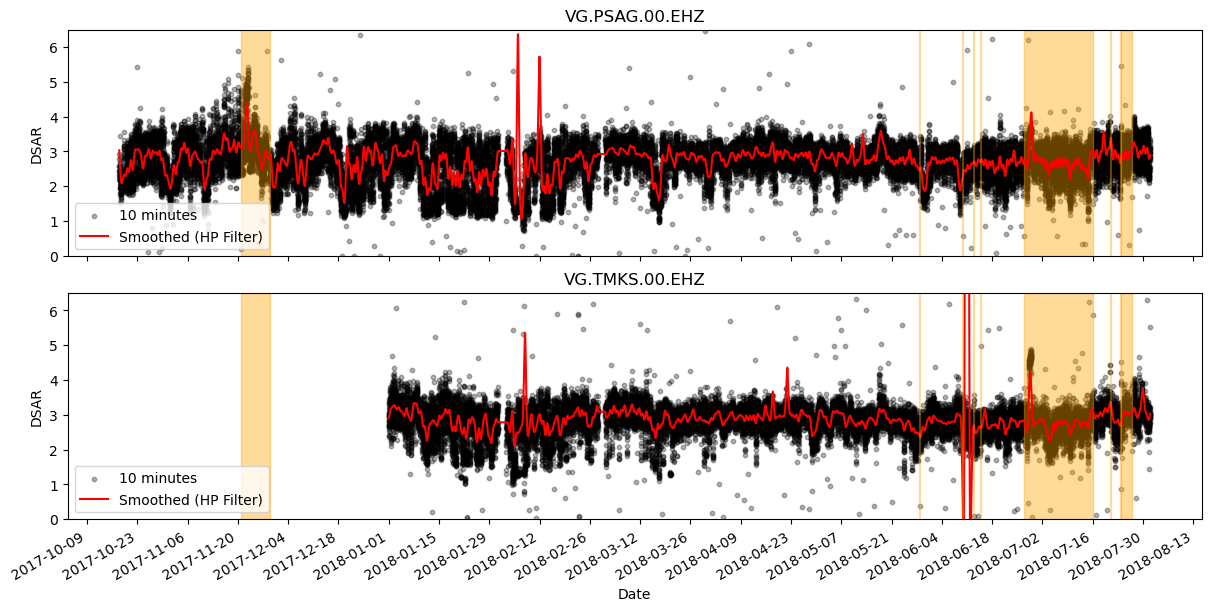

In [38]:
fig, axs = plt.subplots(nrows=len(stations), ncols=1, figsize=(12, 3*len(stations)),
                        layout="constrained", sharex=True)

for index, station in enumerate(stations):
    df = pd.read_csv(os.path.join(dsar_directory, 'DSAR_{}.csv'.format(station)), 
                 index_col='datetime', parse_dates=True)
    
    _,trend = hpfilter(df.DSAR, 1000000)
    axs[index].scatter(df.index, df.DSAR, c= 'k', alpha=0.3, s=10, label='10 minutes'.format(station))
    axs[index].plot(df.index, trend, c='red', label='Smoothed (HP Filter)'.format(station), alpha=1)
    
    axs[index].set_title(station)
    axs[index].legend(loc=3)
    axs[index].set_ylabel('DSAR')
    
    # Plot label only for the last subplot
    if index == (len(stations)-1):
        axs[index].set_xlabel('Date')

    axs[index].xaxis.set_major_locator(mdates.DayLocator(interval=14))
    axs[index].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    
    # Change your limit of DSAR value
    axs[index].set_ylim(0,6.5)
    
    # Plotting continous eruptions
    for continous in continous_eruptions:
        # continous[0] = start date of eruption
        # continous[1] = end date of eruption 
        axs[index].axvspan(continous[0], continous[1], alpha=0.4, color='orange')
    
    # Plotting single eruptions
    for date in single_eruptions:
        axs[index].axvline(datetime.strptime(date, '%Y-%m-%d'), alpha=0.4, color='orange')

    # Rotate label
    for label in axs[index].get_xticklabels(which='major'):
        label.set(rotation=30, horizontalalignment='right')